## Final Project Submission

Please fill out:
* Student name: David Mwiti
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [220]:
# Your code here - remember to use markdown cells for comments as well!
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### First things first, load the data sets
* After importing the required libraries we now use pandas to import our datasets

In [221]:
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')
name_basics = pd.read_csv('name.basics.csv')
movie_info = pd.read_table('rt.movie_info.tsv')
imdb_title = pd.read_csv('title.basics.csv')
imdb_crew = pd.read_csv('title.crew.csv')
imdb_principles = pd.read_csv('title.principals.csv')
imdb_ratings = pd.read_csv('title.ratings.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budget = pd.read_csv('tn.movie_budgets.csv')
# use the encoding as latin1 to read this file as there are some special character in this file
rt_reviews = pd.read_table('rt.reviews.tsv', encoding='latin1') 


### Now check each table to see its contents(columns)
* This is usefull as knowing the columns will be able to tell us which tables are relevant to the analysis
* First ill begin with looking at ratings, tittle, budget and gross tables

In [222]:
imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [223]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [224]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [225]:
# merging the imdb_title and the imdb_ratings dataframes on tconst as this is a unique identifier in both

imdb_df = pd.merge(imdb_title, imdb_ratings, on='tconst')
imdb_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [226]:
# renaming the columns for improved readability and understanding

new_cols = {'tconst':'IMDB_ID', 'primary_title':'title', 'averagerating':'Avg_Rating', 
            'numvotes':'Total_Votes', 'runtime_minutes':'Movie_Runtime_minutes'}

imdb_df.rename(columns = new_cols, inplace= True)
imdb_df.head()

,IMDB_ID,title,original_title,start_year,Movie_Runtime_minutes,genres,Avg_Rating,Total_Votes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [227]:
#lets merge once more to the bom_movie_gross df 

full_imdb_df = pd.merge(imdb_df, bom_movie_gross, on='title')
full_imdb_df.head()

,IMDB_ID,title,original_title,start_year,Movie_Runtime_minutes,genres,Avg_Rating,Total_Votes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


## Data Cleaning
* Now we have a full dataset, after merging 3 important datasets, we can now start the data cleaning process

In [228]:
# create a copy of our dataset
imdb = full_imdb_df.copy()

In [229]:
# there is a repetition of columns in the title and original_title
# ill have to drop the original_title

imdb = imdb.drop('original_title', axis=1)
imdb.head()

,IMDB_ID,title,start_year,Movie_Runtime_minutes,genres,Avg_Rating,Total_Votes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [230]:
imdb.shape

(3027, 11)

In [231]:
# checking the various datatypes and for missing values
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IMDB_ID                3027 non-null   object 
 1   title                  3027 non-null   object 
 2   start_year             3027 non-null   int64  
 3   Movie_Runtime_minutes  2980 non-null   float64
 4   genres                 3020 non-null   object 
 5   Avg_Rating             3027 non-null   float64
 6   Total_Votes            3027 non-null   int64  
 7   studio                 3024 non-null   object 
 8   domestic_gross         3005 non-null   float64
 9   foreign_gross          1832 non-null   object 
 10  year                   3027 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 283.8+ KB


From the above, we notice a few things:
* There are supposed to be at least 3027 row
* Missing values in Title_Runtime_length, Genres, studio, domestic and foreign gross columns
* The column types corespond with expectations however, id like to change the run time length from minutes to a better format
* Ill also convert the domestic_gross to integer from as well as the foreign_gross
* The start_year and year columns are alike, one has to be dropped


In [232]:
# droping all our missing values
# this includes in the domestic and foreign gross as the number of rows missing is not
# worth the hassle as it may skew the data. removing the columns will lead to loss of
# importand data.

imdb = imdb.dropna()
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 1 to 3026
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IMDB_ID                1767 non-null   object 
 1   title                  1767 non-null   object 
 2   start_year             1767 non-null   int64  
 3   Movie_Runtime_minutes  1767 non-null   float64
 4   genres                 1767 non-null   object 
 5   Avg_Rating             1767 non-null   float64
 6   Total_Votes            1767 non-null   int64  
 7   studio                 1767 non-null   object 
 8   domestic_gross         1767 non-null   float64
 9   foreign_gross          1767 non-null   object 
 10  year                   1767 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 165.7+ KB


In [233]:
#checking for duplicates
dup = imdb[imdb.duplicated()]
dup

,IMDB_ID,title,start_year,Movie_Runtime_minutes,genres,Avg_Rating,Total_Votes,studio,domestic_gross,foreign_gross,year


* There are no duplicate values in our imdb dataframe

#### converting foreign_gross to float
* we however notice that some are in the formart 1,456 (include a comma)

In [234]:
# remove the ','
imdb['foreign_gross'] = imdb['foreign_gross'].str.replace(',','')
# convert the resul into float
imdb['foreign_gross'] = imdb['foreign_gross'].astype(float)

In [235]:
#drop the year column
imdb = imdb.drop('year', axis=1)
imdb.head()

,IMDB_ID,title,start_year,Movie_Runtime_minutes,genres,Avg_Rating,Total_Votes,studio,domestic_gross,foreign_gross
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0
5,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0


### The data cleaning has been completed

### Checking Top rated and voted movies genres.

In [294]:
#checking the highest rated type based on votes

top_votes = imdb_df.groupby(['title', 'genres', 'Movie_Runtime_minutes'])[
    ['Avg_Rating','Total_Votes']].max().sort_values(by='Total_Votes'
    , ascending = False).reset_index()
top_votes.head(20)
#len(top_votes)

,title,genres,Movie_Runtime_minutes,Avg_Rating,Total_Votes
0,Inception,"Action,Adventure,Sci-Fi",148.0,8.8,1841066
1,The Dark Knight Rises,"Action,Thriller",164.0,8.4,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",169.0,8.6,1299334
3,Django Unchained,"Drama,Western",165.0,8.4,1211405
4,The Avengers,"Action,Adventure,Sci-Fi",143.0,8.1,1183655
5,The Wolf of Wall Street,"Biography,Crime,Drama",180.0,8.2,1035358
6,Shutter Island,"Mystery,Thriller",138.0,8.1,1005960
7,Guardians of the Galaxy,"Action,Adventure,Comedy",121.0,8.1,948394
8,Deadpool,"Action,Adventure,Comedy",108.0,8.0,820847
9,The Hunger Games,"Action,Adventure,Sci-Fi",142.0,7.2,795227


### checking the top_vote, value_counts to see the most voted for category 

In [259]:
top_categories = top_votes['genres'].value_counts()
top_10_categories = top_categories.head(10)
top_categories.head()

Drama           11580
Documentary     10305
Comedy           5611
Horror           2691
Comedy,Drama     2616
Name: genres, dtype: int64

In [239]:
#Visualizing the top categories

import plotly.express as px
px.bar(top_10_categories)

#### From the above plot, we see the most voted genre is the Drama, we also note that the documentary also has a substancial vote count

In [241]:
imdb.head()

,IMDB_ID,title,start_year,Movie_Runtime_minutes,genres,Avg_Rating,Total_Votes,studio,domestic_gross,foreign_gross
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0
5,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0


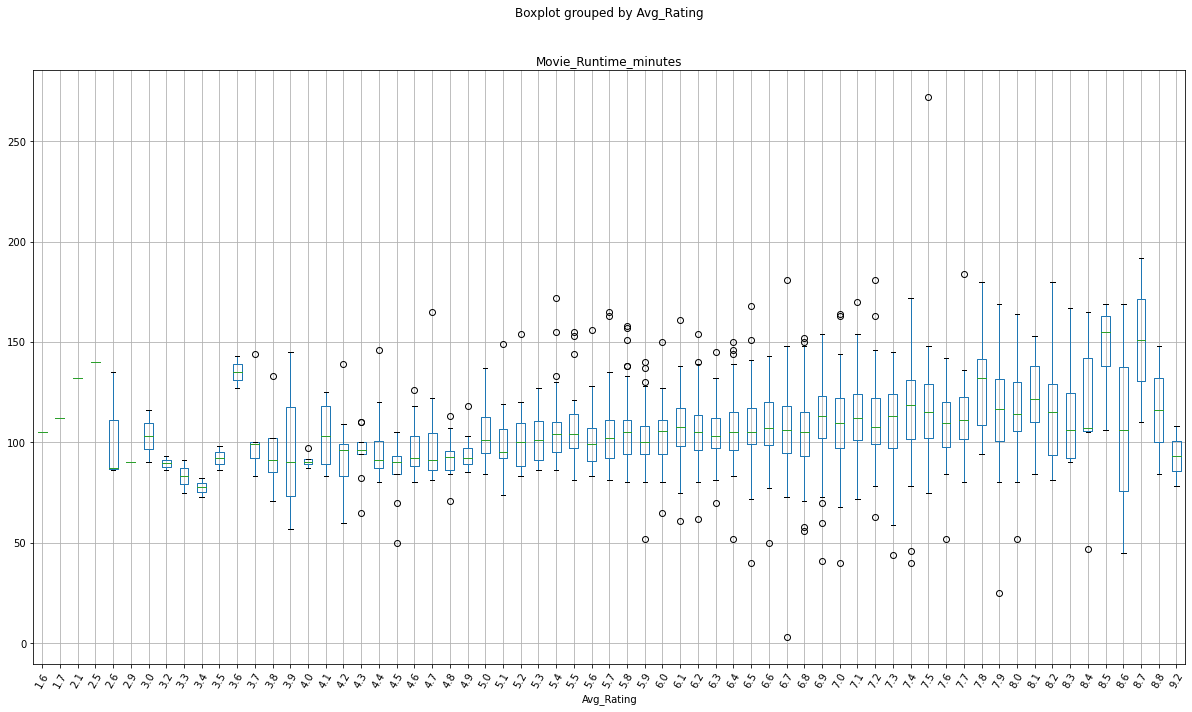

In [254]:
# using a visualization to detect whether there is a relationship between duration and star rating

imdb.boxplot(column= 'Movie_Runtime_minutes', by='Avg_Rating', rot=60, figsize=(20, 11));

* This tells us that if the movie duration is between 125 mins to 100 min it’s more likely to receive a rating.

In [277]:
#Checking for corelation
imdb.corr(method='pearson')

,start_year,Movie_Runtime_minutes,Avg_Rating,Total_Votes,domestic_gross,foreign_gross
start_year,1.000000,0.078435,-0.018670,-0.051393,0.100706,0.121582
Movie_Runtime_minutes,0.078435,1.000000,0.247437,0.333040,0.157622,0.192089
Avg_Rating,-0.018670,0.247437,1.000000,0.375617,0.172428,0.155607
Total_Votes,-0.051393,0.333040,0.375617,1.000000,0.628534,0.553738
domestic_gross,0.100706,0.157622,0.172428,0.628534,1.000000,0.790452
foreign_gross,0.121582,0.192089,0.155607,0.553738,0.790452,1.000000


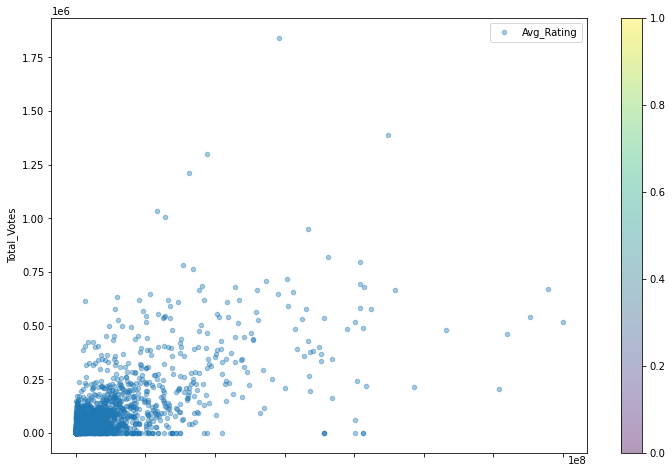

In [283]:
imdb.plot(kind='scatter', x='domestic_gross', y='Total_Votes', alpha=0.4, label='Avg_Rating',
figsize=(12, 8), cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()


* with a Correlation Coefficient of 0.628534 we can see a moderatly positive relationship between the domestic gross and the
  vote count.
* Its therefore safe to say that the votecount can be a better measure of sentiment from the viewers as compared to the ratings
  given that a title with an avg rating of 10.0 may have only had 20 votes as seen in some cases. Also, the correlation between
  Avg_Ratings and domestic gross is at 0.172428, close to zero corelation

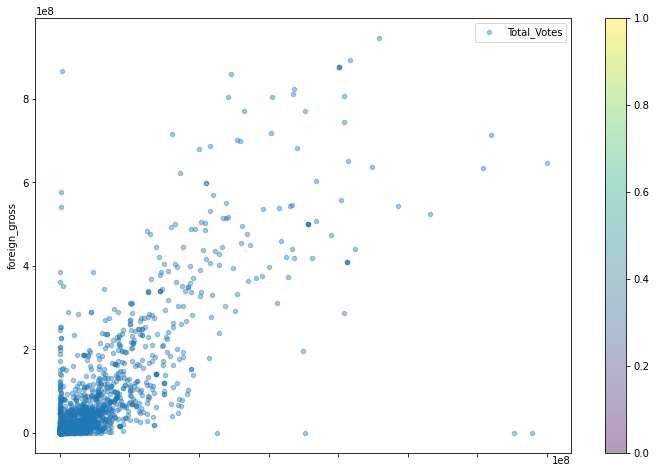

In [299]:
imdb.plot(kind='scatter', x='domestic_gross', y='foreign_gross', alpha=0.4, label='Total_Votes',
figsize=(12, 8), cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

	
* With a 0.790452 Corelation Values between Domestic_Gross and Foreign_gross, indicate a strong positive linear
  relationship.
* Thus it is safe to conclude that factors that contribute to a rise in domestic gross also contribute to the rise in
  foreign_gross